<a href="https://colab.research.google.com/github/MallaRaraju/DP2_villan_image_classification/blob/main/Villan_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dependencies

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy

In [3]:
tf.keras.metrics??



# Setting up with Kaggle


First you need to go to your kaggle account

inside kaggle go to
```
your profile>>account>>API>>create new token
```
youn now have a json file dowloaded into your desktop/laptop

keep that in your google drive

now mount your google drive into the colab


In [4]:
# Run this cell to mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Make a new directory named .kaggle
!mkdir ~/.kaggle

In [6]:
# moke a coppy of your downloaded json file into .kaggle
!cp '/content/drive/MyDrive/kaggle.json' ~/.kaggle/kaggle.json

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

## Download dataset from Kaggle

In [8]:
!kaggle datasets download -d rogeriovaz/villains-image-classification

100% 820k/820k [00:00<00:00, 1.27MB/s]
100% 820k/820k [00:00<00:00, 1.27MB/s]


# Data Pre-processing

In [9]:
# unzip the data
!unzip '/content/villains-image-classification.zip'

Archive:  /content/villains-image-classification.zip
  inflating: Villains/Darth Vader/Vader 1.jpg  
  inflating: Villains/Darth Vader/Vader 10.jpg  
  inflating: Villains/Darth Vader/Vader 11.jpg  
  inflating: Villains/Darth Vader/Vader 12.jpg  
  inflating: Villains/Darth Vader/Vader 13.jpg  
  inflating: Villains/Darth Vader/Vader 14.jpg  
  inflating: Villains/Darth Vader/Vader 15.jpg  
  inflating: Villains/Darth Vader/Vader 16.jpg  
  inflating: Villains/Darth Vader/Vader 17.jpg  
  inflating: Villains/Darth Vader/Vader 18.jpg  
  inflating: Villains/Darth Vader/Vader 19.jpg  
  inflating: Villains/Darth Vader/Vader 2.jpg  
  inflating: Villains/Darth Vader/Vader 20.jpg  
  inflating: Villains/Darth Vader/Vader 3.jpg  
  inflating: Villains/Darth Vader/Vader 4.jpg  
  inflating: Villains/Darth Vader/Vader 5.jpg  
  inflating: Villains/Darth Vader/Vader 6.jpg  
  inflating: Villains/Darth Vader/Vader 7.jpg  
  inflating: Villains/Darth Vader/Vader 8.jpg  
  inflating: Villains/Da

## Creating a data pipeline

In [10]:
tf.keras.utils.image_dataset_from_directory??

In [11]:
data_dir = '/content/Villains'
data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=10)

Found 100 files belonging to 5 classes.


In [12]:
# lets see a sample image of our dataset
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [13]:
batch[0].shape

(10, 256, 256, 3)

In [14]:
batch[1] # labels of the current batch

array([0, 4, 2, 1, 4, 0, 3, 4, 3, 0], dtype=int32)

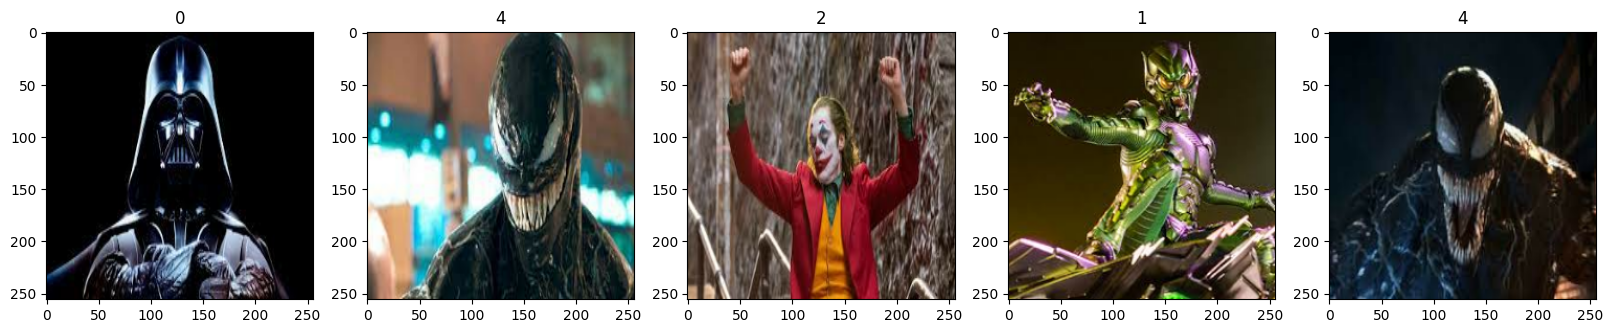

In [15]:
fig, axs = plt.subplots(ncols=5, figsize=(20,20))
for img_index, img in enumerate(batch[0][:5]):
  axs[img_index].imshow(img.astype(int))
  axs[img_index].title.set_text(batch[1][img_index])

Making image pixel values from (0 to 255) range to (0 to 1)

In [16]:
data = data.map(lambda x, y: (x/255,y))

## Partitioning the dataset

In [17]:
train = data.take(7)
test = data.skip(7).take(1)
val = data.skip(8).take(2)
# skip let the shared batches doesn't get into count while sharing
# Need to check it out later (facing an issue)

# Model Building 

In [18]:
model = tf.keras.Sequential()

In [19]:
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(3))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(3))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(3))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(5))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 128)        0

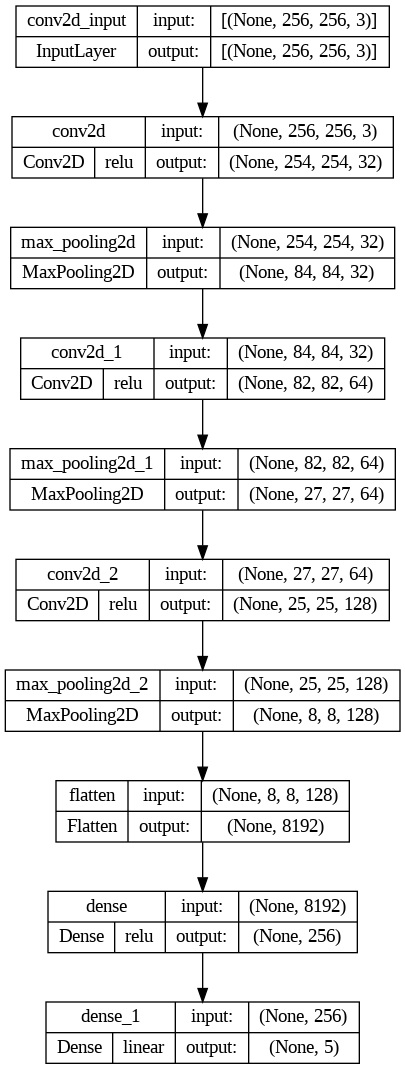

In [21]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True)

# Train the model

In [22]:
# callbacks hold the results from each epoch
log_dir = '/content/logs'
callbacks = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

train,test split

In [23]:
model.compile(optimizer = 'Adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
hist = model.fit(train, epochs = 10, validation_data=val, callbacks=[callbacks])

Epoch 1/10
7/7 [==============================] - 14s 108ms/step - loss: 1.7285 - accuracy: 0.1571 - val_loss: 1.5553 - val_accuracy: 0.4500
Epoch 2/10
7/7 [==============================] - 1s 80ms/step - loss: 1.5794 - accuracy: 0.3714 - val_loss: 1.5740 - val_accuracy: 0.4000
Epoch 3/10
7/7 [==============================] - 1s 76ms/step - loss: 1.5131 - accuracy: 0.3857 - val_loss: 1.4020 - val_accuracy: 0.2500
Epoch 4/10
7/7 [==============================] - 1s 102ms/step - loss: 1.3655 - accuracy: 0.5000 - val_loss: 1.0052 - val_accuracy: 0.8000
Epoch 5/10
7/7 [==============================] - 1s 81ms/step - loss: 1.0726 - accuracy: 0.5857 - val_loss: 1.0174 - val_accuracy: 0.6500
Epoch 6/10
7/7 [==============================] - 1s 99ms/step - loss: 0.9823 - accuracy: 0.6429 - val_loss: 0.8428 - val_accuracy: 0.7000
Epoch 7/10
7/7 [==============================] - 1s 148ms/step - loss: 0.8080 - accuracy: 0.7286 - val_loss: 0.7630 - val_accuracy: 0.7500
Epoch 8/10
7/7 [=======

In [25]:
history = hist.history
history

{'loss': [1.7285064458847046,
  1.5793675184249878,
  1.5130544900894165,
  1.365457534790039,
  1.0726230144500732,
  0.9823166131973267,
  0.808015763759613,
  0.5872449278831482,
  0.3116596043109894,
  0.22519716620445251],
 'accuracy': [0.15714286267757416,
  0.37142857909202576,
  0.3857142925262451,
  0.5,
  0.5857142806053162,
  0.6428571343421936,
  0.7285714149475098,
  0.7857142686843872,
  0.9285714030265808,
  0.9571428298950195],
 'val_loss': [1.5553098917007446,
  1.5739881992340088,
  1.4020450115203857,
  1.0052011013031006,
  1.0173566341400146,
  0.8428314328193665,
  0.7630256414413452,
  0.46422797441482544,
  0.3546058237552643,
  0.0931907370686531],
 'val_accuracy': [0.44999998807907104,
  0.4000000059604645,
  0.25,
  0.800000011920929,
  0.6499999761581421,
  0.699999988079071,
  0.75,
  0.8500000238418579,
  0.8500000238418579,
  1.0]}

# Evaluating our model

In [26]:
model.evaluate(test, callbacks=[callbacks])

1/1 [==============================] - 0s 311ms/step - loss: 0.0347 - accuracy: 1.0000


[0.0347219854593277, 1.0]

In [27]:
precision = Precision()
recall = Recall()
sparse_categorical_accuracy = SparseCategoricalAccuracy()

In [40]:
y_hat = model.predict(test)
y_hat = tf.nn.softmax(y_hat)
y_hat = tf.transpose(y_hat[0:])
y_hat = tf.argmax(y_hat)
y_hat

1/1 [==============================] - 0s 392ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([3, 2, 4, 1, 1, 4, 1, 4, 3, 2])>

In [41]:
for batch in test.as_numpy_iterator():
  X, y = batch

In [44]:
precision.update_state(y, y_hat)
recall.update_state(y, y_hat)
#sparse_categorical_accuracy.update_state(y, y_hat)

In [45]:
print(f'precision:{precision.result()}, recall:{recall.result()},')

precision:0.699999988079071, recall:1.0,


# Visualizing traiing results

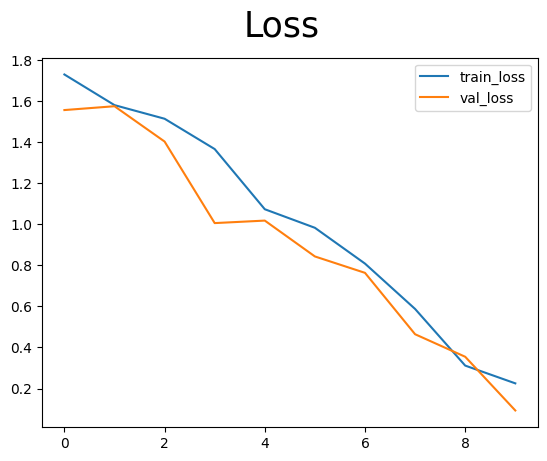

In [48]:
#ploting loss
fig = plt.figure()
plt.plot(history['loss'], label='train_loss')
plt.plot(history['val_loss'], label='val_loss')
plt.suptitle('Loss', fontsize = 25)
plt.legend(loc='upper right')
plt.show()

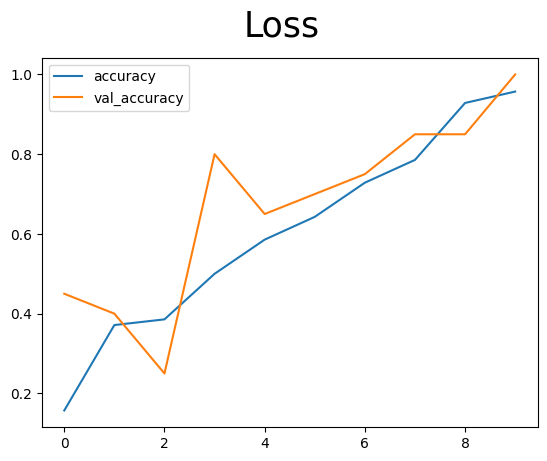

In [49]:
#ploting accuracy
fig = plt.figure()
plt.plot(history['accuracy'], label='accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.suptitle('Loss', fontsize = 25)
plt.legend(loc='upper left')
plt.show()

# Testing with new data

In [73]:
def test(img_path):
  pred_dict = ['Darth Vader', 'Green Goblin', 'Joker', 'Thanos', 'Venom']
  img = cv2.imread(img_path)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  img = tf.image.resize(img, (256,256))
  img = img/255
  input_img = tf.expand_dims(img, 0)
  pred = model.predict(input_img)
  pred = tf.nn.softmax(pred)
  x = tf.argmax(pred[0])
  print("The image you passed {}% matched to {}".format(pred[0][x]*100, pred_dict[x]))

Paste the path of your image here: /venom.jpg
1/1 [==============================] - 0s 21ms/step
The image you passed 75.13862609863281% matched to Joker


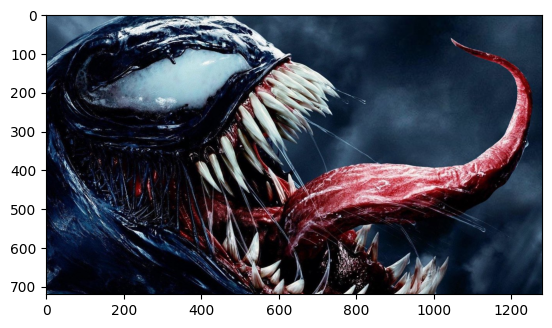

In [78]:
# Seems like our model is not performing well on new images
# to overcome this we can do data augmentation or add extra data
test(input("Paste the path of your image here: "))